# Linear Regression Exercise to predict the cost of insurance

### 0. Import libraries

In [15]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

### 1. ETL (Extract, Transform, and Load) data

In [16]:
# Import insurance dataset
df_insurance = pd.read_csv("datasets/insurance.csv")

# Check the first 5 rows of the dataset
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Data Cleaning

In [17]:
# Use LabelEncoder to convert categorical features into numerical features, as
# models can't work with non-numerical values.
label_encoder = LabelEncoder()
df_insurance["sex"] = label_encoder.fit_transform(df_insurance["sex"])
df_insurance["smoker"] = label_encoder.fit_transform(df_insurance["smoker"])
df_insurance["region"] = label_encoder.fit_transform(df_insurance["region"])

### 4. Exploratory Data Analysis

In [18]:
df_insurance.sort_values(by = "charges", ascending = False)

,age,sex,bmi,children,smoker,region,charges
543,54,0,47.410,0,1,2,63770.42801
1300,45,1,30.360,0,1,2,62592.87309
1230,52,1,34.485,3,1,1,60021.39897
577,31,0,38.095,1,1,0,58571.07448
819,33,0,35.530,0,1,1,55135.40209
...,...,...,...,...,...,...,...
22,18,1,34.100,0,0,2,1137.01100
663,18,1,33.660,0,0,2,1136.39940
1244,18,1,33.330,0,0,2,1135.94070
808,18,1,30.140,0,0,2,1131.50660


In [19]:
df_insurance.sort_values(by = "age", ascending = False)

,age,sex,bmi,children,smoker,region,charges
335,64,1,34.500,0,0,3,13822.80300
603,64,0,39.050,3,0,2,16085.12750
752,64,1,37.905,0,0,1,14210.53595
1265,64,1,23.760,0,1,2,26926.51440
534,64,1,40.480,0,0,2,13831.11520
...,...,...,...,...,...,...,...
942,18,0,40.185,0,0,0,2217.46915
46,18,0,38.665,2,0,0,3393.35635
295,18,1,22.990,0,0,0,1704.56810
50,18,0,35.625,0,0,0,2211.13075


### 3. Train-Test-Validation Split / 5. Feature Engineering (Not done here)

In [20]:
# Select X and Y
# X is the input data, Y is the corresponding output data.
X = df_insurance[["age", "sex", "bmi", "children", "smoker", "region"]] 
y = df_insurance["charges"]

 

# Split data into training and testing data.
"""
- x_train: var that represents subset of original data used for training model.
- x_test: var that represents subset of original data not used for training model. 
    - Helps assess how well the model can generalize its predictions to unseen data.
- y_train: output data associated with x_train.
- y_test: output data associated with x_test. 
    - Used for evaluation phase to compare model's predictions with actual target values 
    in the test set
- Dataset splitting: training set -> 70-80%, test set -> 20-30% (commonly).
- It's a convention to have random_state to be 42.
    - random_state parameter influences how data is randomly shuffled 
    or how random elements are initialized
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
# Scale data by normalizing the numerical data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### 6. Model Selection and Implementation

In [22]:
# Build model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict against the testing set
y_pred = model.predict(X_test_scaled)

### 7. Model Evaluation

In [23]:
# Evaluate the model
mean = np.mean(y_pred, axis = 0)
std = np.std(y_pred, axis = 0)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

In [24]:
# Print the evaluation metrics
print(f"Average cost of the insurance: {mean:.2f}")
print(f"Standard deviation: {std:.2f}")
print(f"Mean absolute error (MAE): {mae:.2f}")
print(f"Mean squared error (MSE): {mse:.2f}")
print(f"Root mean squared error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) score: {r2:.2f}")

Average cost of the insurance: 13094.10
Standard deviation: 10765.18
Mean absolute error (MAE): 4186.01
Mean squared error (MSE): 33633113.94
Root mean squared error (RMSE): 5799.41
R-squared (R2) score: 0.78


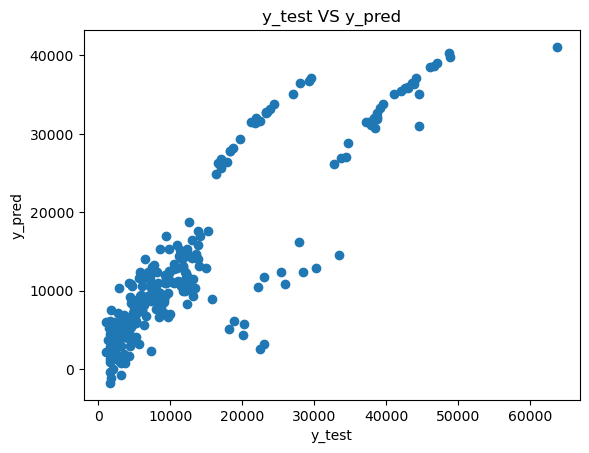

In [25]:
# Show the plot graph
plt.scatter(y_test, y_pred)
plt.title("y_test VS y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()